In [420]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [48]:
train_df = pd.read_csv('data/raw/train.csv', nrows=10000)
test_df = pd.read_csv('data/raw/test.csv', nrows=10000)
stats = pd.read_csv('data/raw/specs.csv')

In [294]:
train_df.head()

event_id      game_session                 timestamp  \
0  27253bdc  45bb1e1b6b50c07b  2019-09-06T17:53:46.937Z   
1  27253bdc  17eeb7f223665f53  2019-09-06T17:54:17.519Z   
2  77261ab5  0848ef14a8dc6892  2019-09-06T17:54:56.302Z   
3  b2dba42b  0848ef14a8dc6892  2019-09-06T17:54:56.387Z   
4  1bb5fbdb  0848ef14a8dc6892  2019-09-06T17:55:03.253Z   

                                          event_data installation_id  \
0             {"event_code": 2000, "event_count": 1}        0001e90f   
1             {"event_code": 2000, "event_count": 1}        0001e90f   
2  {"version":"1.0","event_count":1,"game_time":0...        0001e90f   
3  {"description":"Let's build a sandcastle! Firs...        0001e90f   
4  {"description":"Let's build a sandcastle! Firs...        0001e90f   

   event_count  event_code  game_time                          title  \
0            1        2000          0        Welcome to Lost Lagoon!   
1            1        2000          0           Magma Peak - Level 1   
2            1        2000          0  Sandcastle Builder (Activity)   
3            2        3010         53  Sandcastle Builder (Activity)   
4            3        3110       6972  Sandcastle Builder (Activity)   

       type      world  
0      Clip       NONE  
1      Clip  MAGMAPEAK  
2  Activity  MAGMAPEAK  
3  Activity  MAGMAPEAK  
4  Activity  MAGMAPEAK

In [295]:
test_df.head()

event_id      game_session                 timestamp  \
0  27253bdc  0ea9ecc81a565215  2019-09-10T16:50:24.910Z   
1  27253bdc  c1ea43d8b8261d27  2019-09-10T16:50:55.503Z   
2  27253bdc  7ed86c6b72e725e2  2019-09-10T16:51:51.805Z   
3  27253bdc  7e516ace50e7fe67  2019-09-10T16:53:12.825Z   
4  7d093bf9  a022c3f60ba547e7  2019-09-10T16:54:12.115Z   

                                          event_data installation_id  \
0             {"event_code": 2000, "event_count": 1}        00abaee7   
1             {"event_code": 2000, "event_count": 1}        00abaee7   
2             {"event_code": 2000, "event_count": 1}        00abaee7   
3             {"event_code": 2000, "event_count": 1}        00abaee7   
4  {"version":"1.0","round":0,"event_count":1,"ga...        00abaee7   

   event_count  event_code  game_time                    title  type  \
0            1        2000          0  Welcome to Lost Lagoon!  Clip   
1            1        2000          0     Magma Peak - Level 1  Clip   
2            1        2000          0     Magma Peak - Level 2  Clip   
3            1        2000          0  Crystal Caves - Level 1  Clip   
4            1        2000          0                Chow Time  Game   

          world  
0          NONE  
1     MAGMAPEAK  
2     MAGMAPEAK  
3  CRYSTALCAVES  
4  CRYSTALCAVES

In [84]:
test_df[test_df.installation_id == '00abaee7']

event_id      game_session                 timestamp  \
0    27253bdc  0ea9ecc81a565215  2019-09-10T16:50:24.910Z   
1    27253bdc  c1ea43d8b8261d27  2019-09-10T16:50:55.503Z   
2    27253bdc  7ed86c6b72e725e2  2019-09-10T16:51:51.805Z   
3    27253bdc  7e516ace50e7fe67  2019-09-10T16:53:12.825Z   
4    7d093bf9  a022c3f60ba547e7  2019-09-10T16:54:12.115Z   
..        ...               ...                       ...   
863  832735e1  ee2200d38a57537b  2019-09-12T13:51:37.371Z   
864  ab3136ba  ee2200d38a57537b  2019-09-12T13:51:44.003Z   
865  832735e1  ee2200d38a57537b  2019-09-12T13:51:47.877Z   
866  7961e599  ee2200d38a57537b  2019-09-12T13:51:47.878Z   
867  90d848e0  348d7f09f96af313  2019-09-12T13:52:12.193Z   

                                            event_data installation_id  \
0               {"event_code": 2000, "event_count": 1}        00abaee7   
1               {"event_code": 2000, "event_count": 1}        00abaee7   
2               {"event_code": 2000, "event_count": 1}        00abaee7   
3               {"event_code": 2000, "event_count": 1}        00abaee7   
4    {"version":"1.0","round":0,"event_count":1,"ga...        00abaee7   
..                                                 ...             ...   
863  {"description":"There we have it, folks. Some ...        00abaee7   
864  {"description":"There we have it, folks. Some ...        00abaee7   
865  {"description":"Okay, team, we have to win fou...        00abaee7   
866  {"target_water_level":3,"round":5,"event_count...        00abaee7   
867  {"version":"1.0","event_count":1,"game_time":0...        00abaee7   

     event_count  event_code  game_time                         title  \
0              1        2000          0       Welcome to Lost Lagoon!   
1              1        2000          0          Magma Peak - Level 1   
2              1        2000          0          Magma Peak - Level 2   
3              1        2000          0       Crystal Caves - Level 1   
4              1        2000          0                     Chow Time   
..           ...         ...        ...                           ...   
863          132        3010     178304                     Dino Dive   
864          133        3110     184938                     Dino Dive   
865          134        3010     188805                     Dino Dive   
866          135        2020     188805                     Dino Dive   
867            1        2000          0  Cauldron Filler (Assessment)   

           type         world  
0          Clip          NONE  
1          Clip     MAGMAPEAK  
2          Clip     MAGMAPEAK  
3          Clip  CRYSTALCAVES  
4          Game  CRYSTALCAVES  
..          ...           ...  
863        Game     MAGMAPEAK  
864        Game     MAGMAPEAK  
865        Game     MAGMAPEAK  
866        Game     MAGMAPEAK  
867  Assessment     MAGMAPEAK  

[868 rows x 11 columns]

In [49]:
stats.head()

event_id                                               info  \
0  2b9272f4  The end of system-initiated feedback (Correct)...   
1  df4fe8b6  The end of system-initiated feedback (Incorrec...   
2  3babcb9b  The end of system-initiated instruction event ...   
3  7f0836bf  The end of system-initiated instruction event ...   
4  ab3136ba  The end of system-initiated instruction event ...   

                                                args  
0  [{"name":"game_time","type":"int","info":"mill...  
1  [{"name":"game_time","type":"int","info":"mill...  
2  [{"name":"game_time","type":"int","info":"mill...  
3  [{"name":"game_time","type":"int","info":"mill...  
4  [{"name":"game_time","type":"int","info":"mill...

In [50]:
stats.describe()

event_id                                               info  \
count        386                                                386   
unique       386                                                168   
top     3bf1cf26  This event occurs when the player clicks on th...   
freq           1                                                 17   

                                                     args  
count                                                 386  
unique                                                191  
top     [{"name":"game_time","type":"int","info":"mill...  
freq                                                   25

In [206]:
num = 77
print(stats.event_id[num])
print(stats['info'][num])

1325467d
This event occurs when the player clicks on something that isn’t covered elsewhere. It can be useful in determining if there are attractive distractions (things the player think should do something, but don’t) in the game, or diagnosing players who are having mechanical difficulties (near misses).


In [205]:
print(stats['info'][stats.event_id == '1325467d'])

77    This event occurs when the player clicks on so...
Name: info, dtype: object


In [125]:
print(stats['info'][stats.event_id == 'b2dba42b'])

149    The system-initiated instruction event occurs ...
Name: info, dtype: object


In [207]:
train_df.head(20)

event_id      game_session                 timestamp  \
0   27253bdc  45bb1e1b6b50c07b  2019-09-06T17:53:46.937Z   
1   27253bdc  17eeb7f223665f53  2019-09-06T17:54:17.519Z   
2   77261ab5  0848ef14a8dc6892  2019-09-06T17:54:56.302Z   
3   b2dba42b  0848ef14a8dc6892  2019-09-06T17:54:56.387Z   
4   1bb5fbdb  0848ef14a8dc6892  2019-09-06T17:55:03.253Z   
5   1325467d  0848ef14a8dc6892  2019-09-06T17:55:06.279Z   
6   1325467d  0848ef14a8dc6892  2019-09-06T17:55:06.913Z   
7   1325467d  0848ef14a8dc6892  2019-09-06T17:55:07.546Z   
8   1325467d  0848ef14a8dc6892  2019-09-06T17:55:07.979Z   
9   1325467d  0848ef14a8dc6892  2019-09-06T17:55:08.566Z   
10  1325467d  0848ef14a8dc6892  2019-09-06T17:55:08.966Z   
11  1325467d  0848ef14a8dc6892  2019-09-06T17:55:09.673Z   
12  1325467d  0848ef14a8dc6892  2019-09-06T17:55:09.930Z   
13  1325467d  0848ef14a8dc6892  2019-09-06T17:55:10.157Z   
14  1325467d  0848ef14a8dc6892  2019-09-06T17:55:10.414Z   
15  1325467d  0848ef14a8dc6892  2019-09-06T17:55:10.648Z   
16  1325467d  0848ef14a8dc6892  2019-09-06T17:55:10.911Z   
17  1325467d  0848ef14a8dc6892  2019-09-06T17:55:11.178Z   
18  b2dba42b  0848ef14a8dc6892  2019-09-06T17:55:11.246Z   
19  1325467d  0848ef14a8dc6892  2019-09-06T17:55:11.592Z   

                                           event_data installation_id  \
0              {"event_code": 2000, "event_count": 1}        0001e90f   
1              {"event_code": 2000, "event_count": 1}        0001e90f   
2   {"version":"1.0","event_count":1,"game_time":0...        0001e90f   
3   {"description":"Let's build a sandcastle! Firs...        0001e90f   
4   {"description":"Let's build a sandcastle! Firs...        0001e90f   
5   {"coordinates":{"x":583,"y":605,"stage_width":...        0001e90f   
6   {"coordinates":{"x":601,"y":570,"stage_width":...        0001e90f   
7   {"coordinates":{"x":250,"y":665,"stage_width":...        0001e90f   
8   {"coordinates":{"x":279,"y":629,"stage_width":...        0001e90f   
9   {"coordinates":{"x":839,"y":654,"stage_width":...        0001e90f   
10  {"coordinates":{"x":807,"y":619,"stage_width":...        0001e90f   
11  {"coordinates":{"x":810,"y":611,"stage_width":...        0001e90f   
12  {"coordinates":{"x":827,"y":584,"stage_width":...        0001e90f   
13  {"coordinates":{"x":823,"y":615,"stage_width":...        0001e90f   
14  {"coordinates":{"x":832,"y":614,"stage_width":...        0001e90f   
15  {"coordinates":{"x":875,"y":631,"stage_width":...        0001e90f   
16  {"coordinates":{"x":871,"y":637,"stage_width":...        0001e90f   
17  {"coordinates":{"x":890,"y":645,"stage_width":...        0001e90f   
18  {"description":"Drag the shovel to the molds t...        0001e90f   
19  {"coordinates":{"x":866,"y":650,"stage_width":...        0001e90f   

    event_count  event_code  game_time                          title  \
0             1        2000          0        Welcome to Lost Lagoon!   
1             1        2000          0           Magma Peak - Level 1   
2             1        2000          0  Sandcastle Builder (Activity)   
3             2        3010         53  Sandcastle Builder (Activity)   
4             3        3110       6972  Sandcastle Builder (Activity)   
5             4        4070       9991  Sandcastle Builder (Activity)   
6             5        4070      10622  Sandcastle Builder (Activity)   
7             6        4070      11255  Sandcastle Builder (Activity)   
8             7        4070      11689  Sandcastle Builder (Activity)   
9             8        4070      12272  Sandcastle Builder (Activity)   
10            9        4070      12672  Sandcastle Builder (Activity)   
11           10        4070      13389  Sandcastle Builder (Activity)   
12           11        4070      13639  Sandcastle Builder (Activity)   
13           12        4070      13872  Sandcastle Builder (Activity)   
14           13        4070      14122  Sandcastle Builder (Activity)   
15           14        4070      14356  S

# train_df.event_data

In [193]:
extracted_event_data = pd.io.json.json_normalize(train_df.event_data.apply(json.loads))

In [208]:
extracted_event_data.head(20)

event_code  event_count version  game_time  \
0         2000            1     NaN        NaN   
1         2000            1     NaN        NaN   
2         2000            1     1.0        0.0   
3         3010            2     NaN       53.0   
4         3110            3     NaN     6972.0   
5         4070            4     NaN     9991.0   
6         4070            5     NaN    10622.0   
7         4070            6     NaN    11255.0   
8         4070            7     NaN    11689.0   
9         4070            8     NaN    12272.0   
10        4070            9     NaN    12672.0   
11        4070           10     NaN    13389.0   
12        4070           11     NaN    13639.0   
13        4070           12     NaN    13872.0   
14        4070           13     NaN    14122.0   
15        4070           14     NaN    14356.0   
16        4070           15     NaN    14622.0   
17        4070           16     NaN    14889.0   
18        3010           17     NaN    14956.0   
19        4070           18     NaN    15306.0   

                                          description  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3   Let's build a sandcastle! First, fill up your ...   
4   Let's build a sandcastle! First, fill up your ...   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18      Drag the shovel to the molds to fill them up!   
19                                                NaN   

                                       identifier  media_type  total_duration  \
0                                             NaN           2             NaN   
1                                             NaN           2             NaN   
2                                             NaN           2             NaN   
3   Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape           1          6758.0   
4   Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape           1             NaN   
5                                             NaN           2             NaN   
6                                             NaN           2             NaN   
7                                             NaN           2             NaN   
8                                             NaN           2             NaN   
9                                             NaN           2             NaN   
10                                            NaN           2             NaN   
11                                            NaN           2             NaN   
12                                            NaN           2             NaN   
13                                            NaN           2             NaN   
14                                            NaN           2             NaN   
15                                            NaN           2             NaN   
16                                            NaN           2             NaN   
17                                            NaN           2             NaN   
18                                 Dot_DragShovel           1          2070.0   
19                                            NaN           2             NaN   

    duration  coordinates.x  ...  side  table_weights

In [126]:
for i,w in zip(extracted_event_data.columns, extracted_event_data.count()):
    print(f"{i}: {w}")

event_code: 10000
event_count: 10000
version: 86
game_time: 9885
description: 3352
identifier: 3288
media_type: 3288
total_duration: 1656
duration: 3409
coordinates.x: 5432
coordinates.y: 5432
coordinates.stage_width: 5432
coordinates.stage_height: 5432
castles_placed: 119
molds: 7
size: 1109
sand: 219
filled: 270
level: 1386
round: 4668
movie_id: 64
options: 115
animals: 115
round_target.size: 226
round_target.type: 226
round_target.animal: 226
item_type: 156
position: 382
animal: 156
correct: 488
misses: 218
holding_shell: 185
has_water: 185
shells: 16
holes: 63
shell_size: 156
hole_position: 47
cloud: 128
cloud_size: 128
water_level: 152
time_played: 9
houses: 14
dinosaurs: 92
dinosaur: 158
dinosaurs_placed: 44
house.size: 38
house.position: 38
rocket: 127
height: 171
launched: 57
flowers: 271
flower: 214
growth: 57
stumps: 72
source: 1325
destination: 53
session_duration: 5
exit_type: 3
distance: 55
target_distances: 58
round_prompt: 5
target_size: 11
resources: 70
object_type: 23


In [296]:
# もとのcolumnに含まれるものはdrop対象
drop_columns = [
    'event_code',
    'event_count',
    'game_time',  
]

In [194]:
# 10%以下しか存在しないcolumnは、isna()でcountのみする。
extracted_event_data.count()[extracted_event_data.count() > 1000].drop(drop_columns)

description                 3352
identifier                  3288
media_type                  3288
total_duration              1656
duration                    3409
coordinates.x               5432
coordinates.y               5432
coordinates.stage_width     5432
coordinates.stage_height    5432
size                        1109
level                       1386
round                       4668
source                      1325
dtype: int64

### descrioption

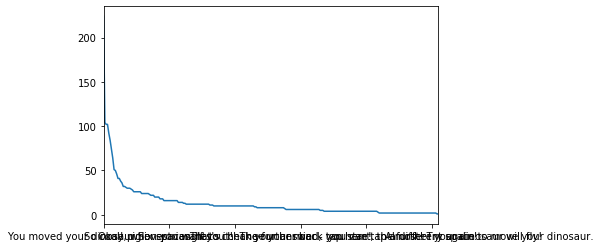

In [197]:
extracted_event_data['description'].value_counts().plot()

In [160]:
extracted_event_data['description'].value_counts().head(10)

253    6648
128     224
46      104
188     102
111     102
Name: description, dtype: int64

In [153]:
# descrioption
labelencoder = LabelEncoder()
extracted_event_data['description'] = extracted_event_data['description'].apply(lambda x: 'nan' if x is np.NaN else x)
labelencoder.fit(extracted_event_data['description'].values)
extracted_event_data['description'] = labelencoder.transform(extracted_event_data['description'].values)
extracted_event_data['description'].head()

### identifier
カンマがついているから、複数の意味をもつかと思ったけど、そんなことなかった。 

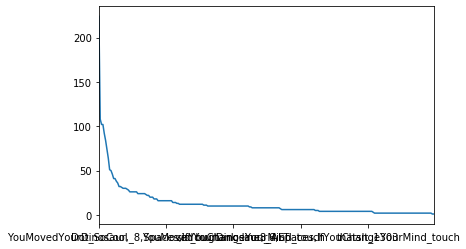

In [198]:
extracted_event_data['identifier'].value_counts().plot()

In [177]:
extracted_event_data['identifier'].value_counts().head(10)

Dot_SoCool            224
Dot_GreatJob          108
sid_1                 102
sid_2                 102
Dot_FillItUp           92
507                    84
sid_3                  74
Dot_AllDoneTapThis     64
sid_bugtank_line22     51
Dot_TryWall            50
Name: identifier, dtype: int64

In [179]:
# identifier
labelencoder = LabelEncoder()
extracted_event_data['identifier'] = extracted_event_data['identifier'].apply(lambda x: 'nan' if x is np.NaN else x)
labelencoder.fit(extracted_event_data['identifier'].values)
extracted_event_data['identifier'] = labelencoder.transform(extracted_event_data['identifier'].values)
extracted_event_data['identifier'].head()

0    198
1    198
2    198
3     53
4     53
Name: identifier, dtype: int64

In [184]:
# identifier と descriptionの相関を確認
np.corrcoef(extracted_event_data['identifier'].values, extracted_event_data['description'].values)

array([[1.        , 0.49277977],
       [0.49277977, 1.        ]])

### media_type

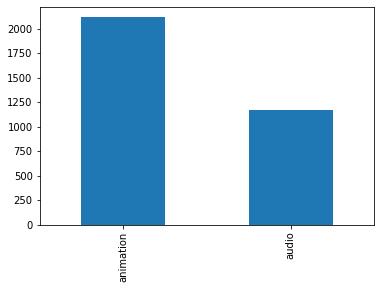

In [190]:
extracted_event_data['media_type'].value_counts().plot.bar()

In [199]:
# descrioption
labelencoder = LabelEncoder()
extracted_event_data['media_type'] = extracted_event_data['media_type'].apply(lambda x: 'nan' if x is np.NaN else x)
labelencoder.fit(extracted_event_data['media_type'].values)
extracted_event_data['media_type'] = labelencoder.transform(extracted_event_data['media_type'].values)
extracted_event_data['media_type'].head()

0    2
1    2
2    2
3    1
4    1
Name: media_type, dtype: int64

### total_duration
max, min, mean等を使う。

In [210]:
extracted_event_data['total_duration'].head()

0       NaN
1       NaN
2       NaN
3    6758.0
4       NaN
Name: total_duration, dtype: float64

### duration
max, min, mean等を使う。

In [211]:
extracted_event_data['duration'].head()

0       NaN
1       NaN
2       NaN
3       NaN
4    6919.0
Name: duration, dtype: float64

### coordinates
平均と分散を取る na

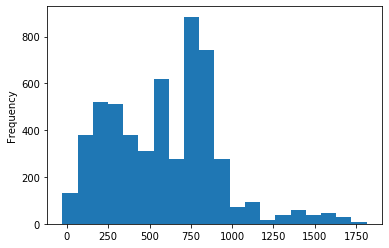

In [217]:
extracted_event_data['coordinates.x'].plot.hist(bins=20)

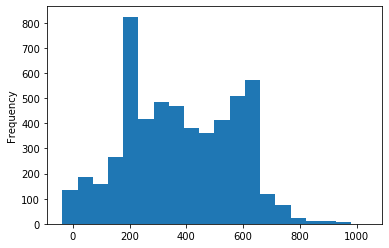

In [218]:
extracted_event_data['coordinates.y'].plot.hist(bins=20)

### stage
- stage_widthとstage_heightを合わせて、labelにする。
- count


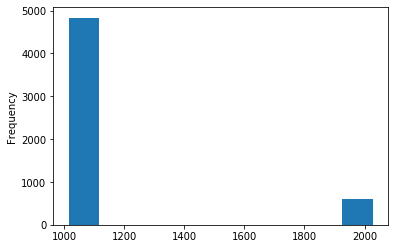

In [220]:
extracted_event_data['coordinates.stage_width'].plot.hist(bins=10)


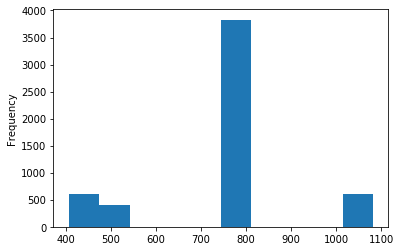

In [221]:
extracted_event_data['coordinates.stage_height'].plot.hist(bins=10)


In [237]:
stage = extracted_event_data[['coordinates.stage_height', 'coordinates.stage_width']]
stage[~stage.isna().any(axis=1)]

coordinates.stage_height  coordinates.stage_width
5                        762.0                   1015.0
6                        762.0                   1015.0
7                        762.0                   1015.0
8                        762.0                   1015.0
9                        762.0                   1015.0
...                        ...                      ...
9993                     762.0                   1015.0
9994                     762.0                   1015.0
9995                     762.0                   1015.0
9996                     762.0                   1015.0
9999                     762.0                   1015.0

[5432 rows x 2 columns]

In [259]:
extracted_event_data['coordinates.stage_height'].astype(np.str) + extracted_event_data['coordinates.stage_width'].astype(np.str)

0           [nan nan]
1           [nan nan]
2           [nan nan]
3           [nan nan]
4           [nan nan]
            ...      
9995    [ 762. 1015.]
9996    [ 762. 1015.]
9997        [nan nan]
9998        [nan nan]
9999    [ 762. 1015.]
Length: 10000, dtype: object

In [266]:
labelencoder = LabelEncoder()

labelencoder.fit(extracted_event_data['coordinates.stage_height'].astype(np.str) + extracted_event_data['coordinates.stage_width'].astype(np.str))
stage = labelencoder.transform(extracted_event_data['coordinates.stage_height'].astype(np.str) + extracted_event_data['coordinates.stage_width'].astype(np.str))

    

In [279]:
print(labelencoder.classes_)

['1082.02028.0' '406.01015.0' '468.01014.0' '524.01014.0' '541.01014.0'
 '762.01015.0' 'nannan']


In [273]:
pd.Series(stage).value_counts()

6    4568
5    3829
0     600
4     355
1     345
2     253
3      50
dtype: int64

### size
isna max average

In [283]:
extracted_event_data['size'].value_counts()

0.0    432
3.0    240
1.0    209
2.0    144
4.0     59
5.0     14
6.0     11
Name: size, dtype: int64

level
average or str or max

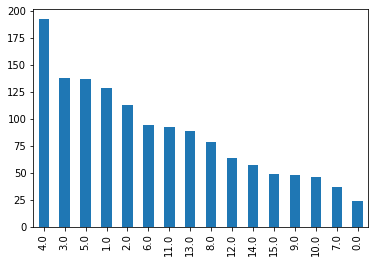

In [289]:
extracted_event_data['level'].value_counts().plot.bar()

### round
average or max

In [292]:
extracted_event_data['round'].value_counts()

1.0     973
2.0     689
3.0     582
0.0     431
7.0     208
5.0     177
4.0     163
6.0     150
8.0     122
9.0     100
10.0     95
11.0     86
14.0     62
13.0     61
12.0     60
15.0     54
33.0     50
22.0     41
20.0     36
23.0     30
45.0     29
48.0     26
16.0     26
53.0     22
43.0     22
40.0     21
34.0     20
19.0     19
25.0     18
24.0     18
44.0     17
27.0     16
26.0     15
18.0     15
42.0     14
17.0     14
29.0     12
31.0     11
46.0     11
32.0     11
21.0     11
41.0     11
38.0     11
47.0     10
57.0     10
37.0     10
52.0      9
51.0      9
50.0      8
30.0      7
36.0      7
39.0      7
56.0      6
49.0      5
55.0      5
35.0      5
54.0      5
28.0      5
Name: round, dtype: int64

### source

In [293]:
extracted_event_data['source'].value_counts()

resources    567
right        146
left         122
7             46
10            41
2             40
4             40
11            38
N/A           37
8             36
middle        34
5             32
9             32
scale         30
3             26
12            24
1             24
6             10
Name: source, dtype: int64

In [434]:
labelencoder = LabelEncoder()
labelencoder.fit(extracted_event_data['source'].astype(np.str))
source = labelencoder.transform(extracted_event_data['source'].astype(np.str))

LabelEncoder()

In [438]:
pd.Series(source).value_counts()

15    8675
16     567
17     146
13     122
9       46
1       41
6       40
4       40
2       38
12      37
10      36
14      34
11      32
7       32
18      30
5       26
3       24
0       24
8       10
dtype: int64

## 実装用コード

In [401]:
train_df = pd.read_csv('data/raw/train.csv', nrows=10000)

In [402]:
train_df.head()

event_id      game_session                 timestamp  \
0  27253bdc  45bb1e1b6b50c07b  2019-09-06T17:53:46.937Z   
1  27253bdc  17eeb7f223665f53  2019-09-06T17:54:17.519Z   
2  77261ab5  0848ef14a8dc6892  2019-09-06T17:54:56.302Z   
3  b2dba42b  0848ef14a8dc6892  2019-09-06T17:54:56.387Z   
4  1bb5fbdb  0848ef14a8dc6892  2019-09-06T17:55:03.253Z   

                                          event_data installation_id  \
0             {"event_code": 2000, "event_count": 1}        0001e90f   
1             {"event_code": 2000, "event_count": 1}        0001e90f   
2  {"version":"1.0","event_count":1,"game_time":0...        0001e90f   
3  {"description":"Let's build a sandcastle! Firs...        0001e90f   
4  {"description":"Let's build a sandcastle! Firs...        0001e90f   

   event_count  event_code  game_time                          title  \
0            1        2000          0        Welcome to Lost Lagoon!   
1            1        2000          0           Magma Peak - Level 1   
2            1        2000          0  Sandcastle Builder (Activity)   
3            2        3010         53  Sandcastle Builder (Activity)   
4            3        3110       6972  Sandcastle Builder (Activity)   

       type      world  
0      Clip       NONE  
1      Clip  MAGMAPEAK  
2  Activity  MAGMAPEAK  
3  Activity  MAGMAPEAK  
4  Activity  MAGMAPEAK

In [ ]:
drop_columns = [
    'event_code',
    'event_count',
    'game_time',  
]

In [406]:
extracted_event_data = pd.io.json.json_normalize(train_df.event_data.apply(json.loads))
extracted_event_data = extracted_event_data.drop(drop_columns, axis=1)

In [407]:
extracted_event_data.head()

version                                        description  \
0     NaN                                                NaN   
1     NaN                                                NaN   
2     1.0                                                NaN   
3     NaN  Let's build a sandcastle! First, fill up your ...   
4     NaN  Let's build a sandcastle! First, fill up your ...   

                                      identifier media_type  total_duration  \
0                                            NaN        NaN             NaN   
1                                            NaN        NaN             NaN   
2                                            NaN        NaN             NaN   
3  Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape      audio          6758.0   
4  Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape      audio             NaN   

   duration  coordinates.x  coordinates.y  coordinates.stage_width  \
0       NaN            NaN            NaN                      NaN   
1       NaN            NaN            NaN                      NaN   
2       NaN            NaN            NaN                      NaN   
3       NaN            NaN            NaN                      NaN   
4    6919.0            NaN            NaN                      NaN   

   coordinates.stage_height  ... side table_weights  starting_weights  \
0                       NaN  ...  NaN           NaN               NaN   
1                       NaN  ...  NaN           NaN               NaN   
2                       NaN  ...  NaN           NaN               NaN   
3                       NaN  ...  NaN           NaN               NaN   
4                       NaN  ...  NaN           NaN               NaN   

   tape_length bug_length  dwell_time  total_bowls bowls has_toy bowl_id  
0          NaN        NaN         NaN          NaN   NaN     NaN     NaN  
1          NaN        NaN         NaN          NaN   NaN     NaN     NaN  
2          NaN        NaN         NaN          NaN   NaN     NaN     NaN  
3          NaN        NaN         NaN          NaN   NaN     NaN     NaN  
4          NaN        NaN         NaN          NaN   NaN     NaN     NaN  

[5 rows x 114 columns]

In [338]:
little_column = extracted_event_data.count()[extracted_event_data.count() < 1000].index

In [408]:
for column in little_column:
    print(column)

version
castles_placed
molds
sand
filled
movie_id
options
animals
round_target.size
round_target.type
round_target.animal
item_type
position
animal
correct
misses
holding_shell
has_water
shells
holes
shell_size
hole_position
cloud
cloud_size
water_level
time_played
houses
dinosaurs
dinosaur
dinosaurs_placed
house.size
house.position
rocket
height
launched
flowers
flower
growth
stumps
destination
session_duration
exit_type
distance
target_distances
round_prompt
target_size
resources
object_type
group
bug
buglength
stage_number
hat
caterpillar
hats
caterpillars
bird_height
target_containers
container_type
containers
current_containers
total_containers
toy_earned
object
previous_jars
bottles
bottle.amount
bottle.color
jar
jar_filled
tutorial_step
hats_placed
toy
diet
target_weight
weight
scale_weight
scale_contents
target_water_level
buckets
target_bucket
mode
prompt
round_number
bucket
buckets_placed
cauldron
layout.left.chickens
layout.left.pig
layout.right.chickens
layout.right.pig
sid

In [409]:
extracted_event_data.loc[:,little_column] = np.where(extracted_event_data[little_column].isna().values, 0, 1)

In [410]:
extracted_event_data.head()

version                                        description  \
0        0                                                NaN   
1        0                                                NaN   
2        1                                                NaN   
3        0  Let's build a sandcastle! First, fill up your ...   
4        0  Let's build a sandcastle! First, fill up your ...   

                                      identifier media_type  total_duration  \
0                                            NaN        NaN             NaN   
1                                            NaN        NaN             NaN   
2                                            NaN        NaN             NaN   
3  Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape      audio          6758.0   
4  Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape      audio             NaN   

   duration  coordinates.x  coordinates.y  coordinates.stage_width  \
0       NaN            NaN            NaN                      NaN   
1       NaN            NaN            NaN                      NaN   
2       NaN            NaN            NaN                      NaN   
3       NaN            NaN            NaN                      NaN   
4    6919.0            NaN            NaN                      NaN   

   coordinates.stage_height  ...  side  table_weights  starting_weights  \
0                       NaN  ...     0              0                 0   
1                       NaN  ...     0              0                 0   
2                       NaN  ...     0              0                 0   
3                       NaN  ...     0              0                 0   
4                       NaN  ...     0              0                 0   

   tape_length  bug_length  dwell_time  total_bowls  bowls  has_toy  bowl_id  
0            0           0           0            0      0        0        0  
1            0           0           0            0      0        0        0  
2            0           0           0            0      0        0        0  
3            0           0           0            0      0        0        0  
4            0           0           0            0      0        0        0  

[5 rows x 114 columns]

In [411]:
# descrioption
labelencoder = LabelEncoder()
extracted_event_data['description'] = extracted_event_data['description'].apply(lambda x: 'nan' if x is np.NaN else x)
labelencoder.fit(extracted_event_data['description'].values)
extracted_event_data['description'] = labelencoder.transform(extracted_event_data['description'].values)
extracted_event_data['description'].head()

0    253
1    253
2    253
3     81
4     81
Name: description, dtype: int64

In [412]:
# identifier
labelencoder = LabelEncoder()
extracted_event_data['identifier'] = extracted_event_data['identifier'].apply(lambda x: 'nan' if x is np.NaN else x)
labelencoder.fit(extracted_event_data['identifier'].values)
extracted_event_data['identifier'] = labelencoder.transform(extracted_event_data['identifier'].values)
extracted_event_data['identifier'].head()

0    198
1    198
2    198
3     53
4     53
Name: identifier, dtype: int64

In [413]:
# media_type
labelencoder = LabelEncoder()
extracted_event_data['media_type'] = extracted_event_data['media_type'].apply(lambda x: 'nan' if x is np.NaN else x)
labelencoder.fit(extracted_event_data['media_type'].values)
extracted_event_data['media_type'] = labelencoder.transform(extracted_event_data['media_type'].values)
extracted_event_data['media_type'].head()

0    2
1    2
2    2
3    1
4    1
Name: media_type, dtype: int64

In [417]:
# coordinates
extracted_event_data['coordinates'] = extracted_event_data['coordinates.stage_height'].astype(np.str) + extracted_event_data['coordinates.stage_width'].astype(np.str)
labelencoder = LabelEncoder()
labelencoder.fit(extracted_event_data['coordinates'].values)
extracted_event_data['coordinates'] = labelencoder.transform(extracted_event_data['coordinates'].values)
extracted_event_data = extracted_event_data.drop(['coordinates.stage_height', 'coordinates.stage_width'], axis=1)

In [439]:
# source
labelencoder = LabelEncoder()
labelencoder.fit(extracted_event_data['source'].astype(np.str))
extracted_event_data['source'] = labelencoder.transform(extracted_event_data['source'].astype(np.str))

In [445]:
extracted_event_data.loc[:, extracted_event_data.isna().any()]

total_duration  duration  coordinates.x  coordinates.y  size  level  \
0                NaN       NaN            NaN            NaN   NaN    NaN   
1                NaN       NaN            NaN            NaN   NaN    NaN   
2                NaN       NaN            NaN            NaN   NaN    NaN   
3             6758.0       NaN            NaN            NaN   NaN    NaN   
4                NaN    6919.0            NaN            NaN   NaN    NaN   
...              ...       ...            ...            ...   ...    ...   
9995             NaN       NaN          782.0          207.0   0.0    NaN   
9996             NaN     518.0          253.0          623.0   2.0    NaN   
9997           800.0       NaN            NaN            NaN   NaN    NaN   
9998             NaN     700.0            NaN            NaN   NaN    NaN   
9999             NaN       NaN          782.0          207.0   0.0    NaN   

      round  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
9995    NaN  
9996    NaN  
9997    NaN  
9998    NaN  
9999    NaN  

[10000 rows x 7 columns]

In [418]:
extracted_event_data[]

version  description  identifier  media_type  total_duration  duration  \
0           0          253         198           2             NaN       NaN   
1           0          253         198           2             NaN       NaN   
2           1          253         198           2             NaN       NaN   
3           0           81          53           1          6758.0       NaN   
4           0           81          53           1             NaN    6919.0   
...       ...          ...         ...         ...             ...       ...   
9995        0          253         198           2             NaN       NaN   
9996        0          253         198           2             NaN     518.0   
9997        0           31          47           1           800.0       NaN   
9998        0           31          47           1             NaN     700.0   
9999        0          253         198           2             NaN       NaN   

      coordinates.x  coordinates.y  castles_placed  molds  ...  table_weights  \
0               NaN            NaN               0      0  ...              0   
1               NaN            NaN               0      0  ...              0   
2               NaN            NaN               0      0  ...              0   
3               NaN            NaN               0      0  ...              0   
4               NaN            NaN               0      0  ...              0   
...             ...            ...             ...    ...  ...            ...   
9995          782.0          207.0               0      0  ...              0   
9996          253.0          623.0               0      0  ...              0   
9997            NaN            NaN               0      0  ...              0   
9998            NaN            NaN               0      0  ...              0   
9999          782.0          207.0               0      0  ...              0   

      starting_weights  tape_length  bug_length  dwell_time  total_bowls  \
0                    0            0           0           0            0   
1                    0            0           0           0            0   
2                    0            0           0           0            0   
3                    0            0           0           0            0   
4                    0            0           0           0            0   
...                ...          ...         ...         ...          ...   
9995                 0            0           0           0            0   
9996                 0            0           0           0            0   
9997                 0            0           0           0            0   
9998                 0            0           0           0            0   
9999                 0            0           0           0            0   

      bowls  has_toy  bowl_id  coordinates  
0         0        0        0            6  
1         0        0        0            6  
2         0        0        0            6  
3         0        0        0            6  
4         0        0        0            6  
...     ...      ...      ...          ...  
9995      0        0        0            5  
9996      0        0        0            5  
9997      0        0        0            6  
9998      0        0        0            6  
9999      0        0        0            5  

[10000 rows x 113 columns]

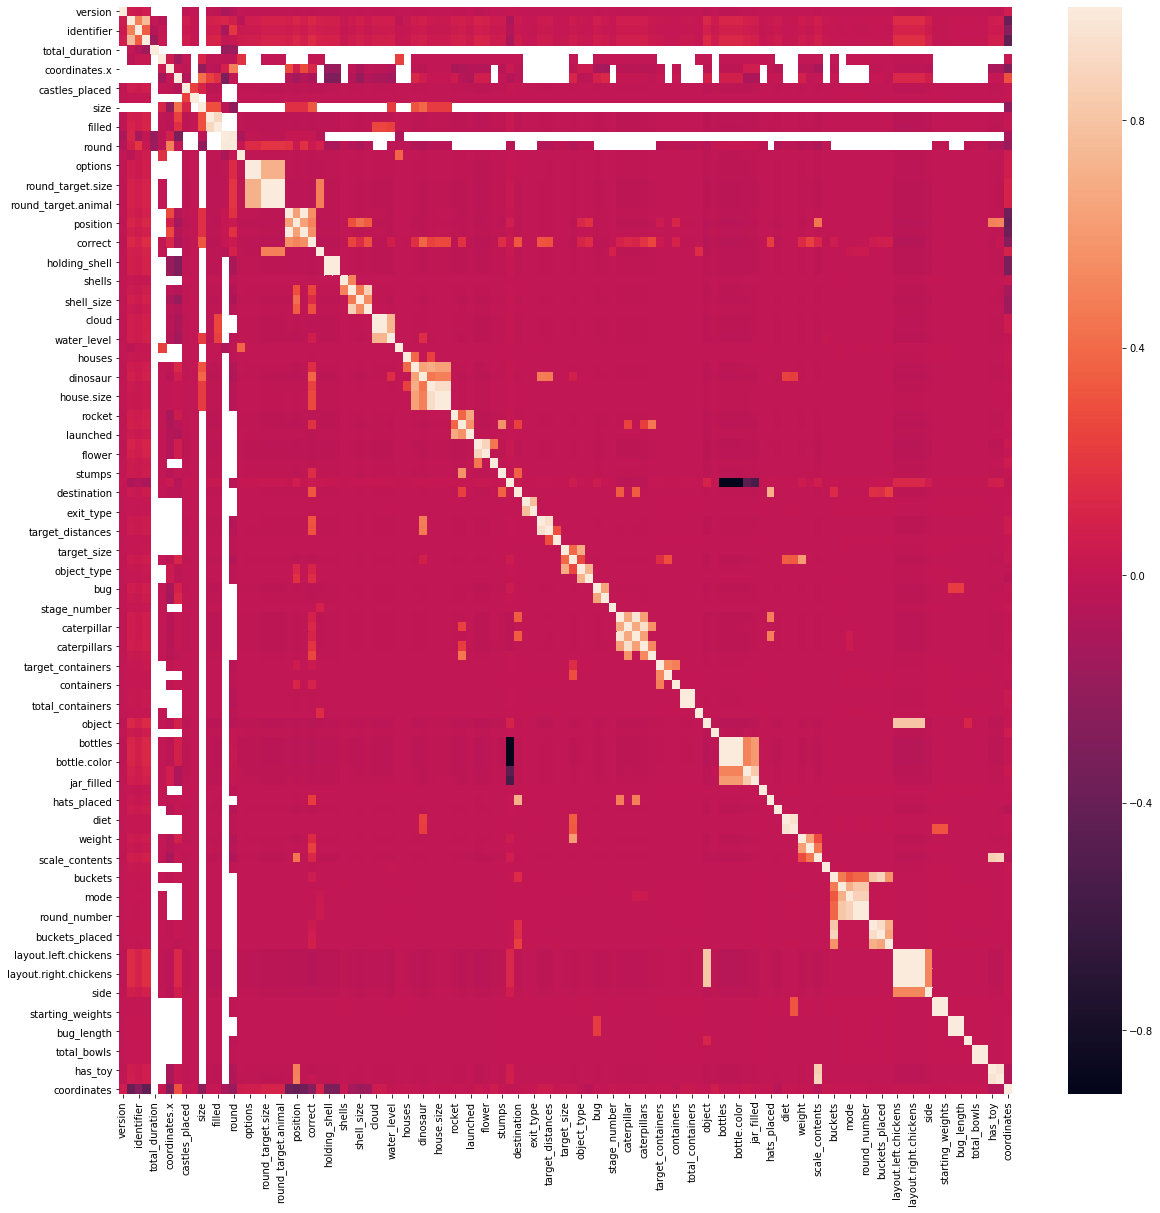

In [446]:
plt.figure(figsize=(20,20))
sns.heatmap(extracted_event_data.corr())
plt.show()

In [426]:
from sklearn.feature_selection import VarianceThreshold

In [479]:
vt = VarianceThreshold(0.01*(1-0.01))

In [480]:
extracted_event_data.shape

(10000, 113)

In [481]:
cut_extracted_event_data = vt.fit_transform(extracted_event_data)

In [482]:
cut_extracted_event_data.shape

(10000, 54)

In [483]:
cut_extracted_event_data

array([[253., 198.,   2., ...,   0.,   0.,   6.],
       [253., 198.,   2., ...,   0.,   0.,   6.],
       [253., 198.,   2., ...,   0.,   0.,   6.],
       ...,
       [ 31.,  47.,   1., ...,   0.,   0.,   6.],
       [ 31.,  47.,   1., ...,   0.,   0.,   6.],
       [253., 198.,   2., ...,   0.,   0.,   5.]])

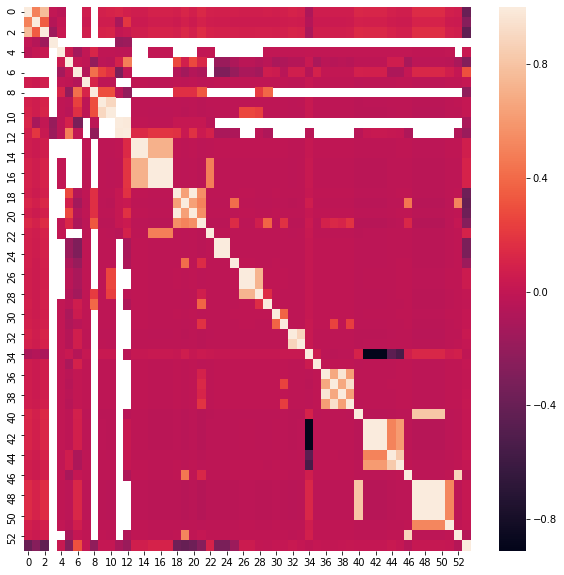

In [484]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(cut_extracted_event_data).corr())
plt.show()

In [497]:
threshold = 0.95
feat_corr = set()
corr_matrix = extracted_event_data.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feat_name = corr_matrix.columns[i]
            feat_corr.add(feat_name)

print(len(set(feat_corr)))
extracted_event_data.drop(labels=feat_corr, axis='columns', inplace=True)
print(len(extracted_event_data.columns))

3
93


In [498]:
feat_corr

{'bowl_id', 'hats', 'round'}

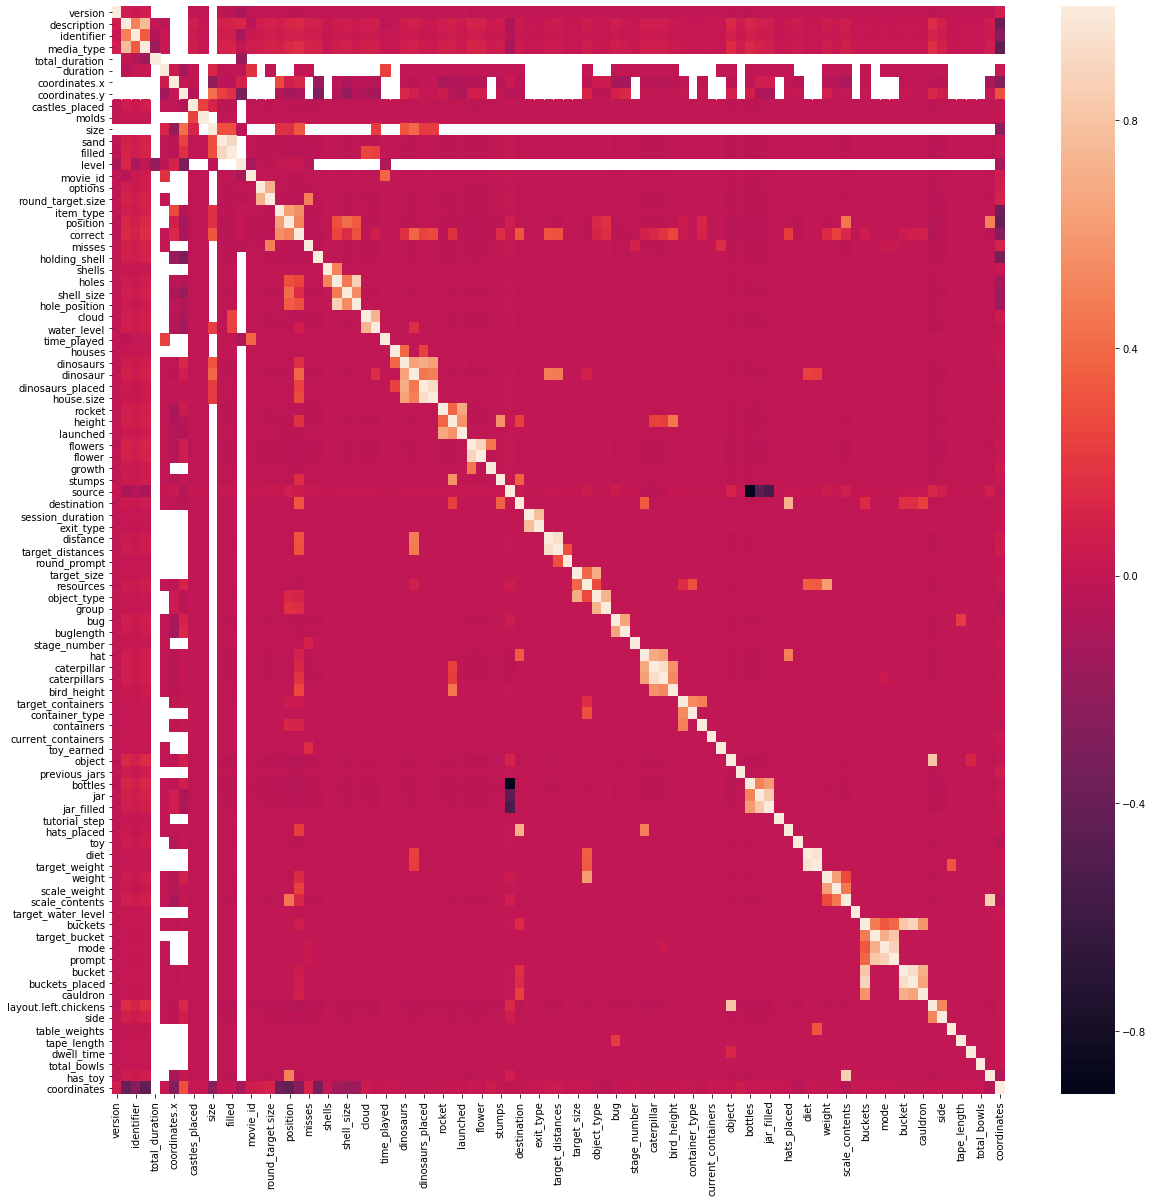

In [499]:
plt.figure(figsize=(20,20))
sns.heatmap(extracted_event_data.corr())
plt.show()

In [505]:
extracted_event_data.describe()

version   description    identifier    media_type  total_duration  \
count  10000.000000  10000.000000  10000.000000  10000.000000     1656.000000   
mean       0.008600    209.539100    175.565300      1.459800     3189.539855   
std        0.092341     73.650254     56.411816      0.819299     2728.325471   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000    185.000000    198.000000      1.000000     1400.000000   
50%        0.000000    253.000000    198.000000      2.000000     2338.000000   
75%        0.000000    253.000000    198.000000      2.000000     4302.500000   
max        1.000000    256.000000    250.000000      2.000000    21490.000000   

           duration  coordinates.x  coordinates.y  castles_placed  \
count  3.409000e+03    5432.000000    5432.000000    10000.000000   
mean   1.217149e+04     591.864507     378.094440        0.011900   
std    3.616311e+05     333.431022     192.721954        0.108442   
min    0.000000e+00     -28.000000     -37.000000        0.000000   
25%    6.190000e+02     299.750000     207.000000        0.000000   
50%    1.377000e+03     581.000000     362.000000        0.000000   
75%    3.600000e+03     814.000000     548.000000        0.000000   
max    1.493333e+07    1814.000000    1035.000000        1.000000   

             molds  ...  buckets_placed      cauldron  layout.left.chickens  \
count  10000.00000  ...     10000.00000  10000.000000          10000.000000   
mean       0.00070  ...         0.00070      0.000300              0.057200   
std        0.02645  ...         0.02645      0.017319              0.232236   
min        0.00000  ...         0.00000      0.000000              0.000000   
25%        0.00000  ...         0.00000      0.000000              0.000000   
50%        0.00000  ...         0.00000      0.000000              0.000000   
75%        0.00000  ...         0.00000      0.000000              0.000000   
max        1.00000  ...         1.00000      1.000000              1.000000   

              side  table_weights   tape_length    dwell_time   total_bowls  \
count  10000.00000     10000.0000  10000.000000  10000.000000  10000.000000   
mean       0.01620         0.0001      0.000600      0.000600      0.000500   
std        0.12625         0.0100      0.024489      0.024489      0.022356   
min        0.00000         0.0000      0.000000      0.000000      0.000000   
25%        0.00000         0.0000      0.000000      0.000000      0.000000   
50%        0.00000         0.0000      0.000000      0.000000      0.000000   
75%        0.00000         0.0000      0.000000      0.000000      0.000000   
max        1.00000         1.0000      1.000000      1.000000      1.000000   

            has_toy   coordinates  
count  10000.000000  10000.000000  
mean       0.009600      4.897400  
std        0.097513      1.667858  
min        0.000000      0.000000  
25%        0.000000      5.000000  
50%        0.000000      5.000000  
75%        0.000000      6.000000  
max        1.000000      6.000000  

[8 rows x 93 columns]

In [506]:
train_df

event_id      game_session                 timestamp  \
0     27253bdc  45bb1e1b6b50c07b  2019-09-06T17:53:46.937Z   
1     27253bdc  17eeb7f223665f53  2019-09-06T17:54:17.519Z   
2     77261ab5  0848ef14a8dc6892  2019-09-06T17:54:56.302Z   
3     b2dba42b  0848ef14a8dc6892  2019-09-06T17:54:56.387Z   
4     1bb5fbdb  0848ef14a8dc6892  2019-09-06T17:55:03.253Z   
...        ...               ...                       ...   
9995  5e812b27  0f0820e60515b9d2  2019-10-10T19:02:03.750Z   
9996  9ee1c98c  0f0820e60515b9d2  2019-10-10T19:02:04.651Z   
9997  b2dba42b  0f0820e60515b9d2  2019-10-10T19:02:04.651Z   
9998  1bb5fbdb  0f0820e60515b9d2  2019-10-10T19:02:05.345Z   
9999  5e812b27  0f0820e60515b9d2  2019-10-10T19:02:05.882Z   

                                             event_data installation_id  \
0                {"event_code": 2000, "event_count": 1}        0001e90f   
1                {"event_code": 2000, "event_count": 1}        0001e90f   
2     {"version":"1.0","event_count":1,"game_time":0...        0001e90f   
3     {"description":"Let's build a sandcastle! Firs...        0001e90f   
4     {"description":"Let's build a sandcastle! Firs...        0001e90f   
...                                                 ...             ...   
9995  {"size":0,"coordinates":{"x":782,"y":207,"stag...        00195df7   
9996  {"size":2,"sand":1,"duration":518,"coordinates...        00195df7   
9997  {"description":"Fill it up!","identifier":"Dot...        00195df7   
9998  {"description":"Fill it up!","identifier":"Dot...        00195df7   
9999  {"size":0,"coordinates":{"x":782,"y":207,"stag...        00195df7   

      event_count  event_code  game_time                          title  \
0               1        2000          0        Welcome to Lost Lagoon!   
1               1        2000          0           Magma Peak - Level 1   
2               1        2000          0  Sandcastle Builder (Activity)   
3               2        3010         53  Sandcastle Builder (Activity)   
4               3        3110       6972  Sandcastle Builder (Activity)   
...           ...         ...        ...                            ...   
9995          179        4030     172434  Sandcastle Builder (Activity)   
9996          181        4021     173351  Sandcastle Builder (Activity)   
9997          180        3010     173351  Sandcastle Builder (Activity)   
9998          182        3110     174051  Sandcastle Builder (Activity)   
9999          183        4030     174567  Sandcastle Builder (Activity)   

          type      world  
0         Clip       NONE  
1         Clip  MAGMAPEAK  
2     Activity  MAGMAPEAK  
3     Activity  MAGMAPEAK  
4     Activity  MAGMAPEAK  
...        ...        ...  
9995  Activity  MAGMAPEAK  
9996  Activity  MAGMAPEAK  
9997  Activity  MAGMAPEAK  
9998  Activity  MAGMAPEAK  
9999  Activity  MAGMAPEAK  

[10000 rows x 11 columns]

In [309]:
train_df = train_df.drop('event_data', axis=1)

In [317]:
train_df = pd.concat([train_df, extracted_event_data], axis=1)

In [323]:
for index, (id, data) in enumerate(train_df.groupby('installation_id', sort=False)):
    for i, game_data in data.groupby('game_session', sort=False):
        A = game_data
        if index == 0:
            break

In [324]:
A

event_id      game_session                 timestamp installation_id  \
9817  77261ab5  0f0820e60515b9d2  2019-10-10T18:58:59.551Z        00195df7   
9818  b2dba42b  0f0820e60515b9d2  2019-10-10T18:58:59.657Z        00195df7   
9819  1325467d  0f0820e60515b9d2  2019-10-10T18:59:01.565Z        00195df7   
9820  1325467d  0f0820e60515b9d2  2019-10-10T18:59:02.309Z        00195df7   
9821  1325467d  0f0820e60515b9d2  2019-10-10T18:59:02.846Z        00195df7   
...        ...               ...                       ...             ...   
9995  5e812b27  0f0820e60515b9d2  2019-10-10T19:02:03.750Z        00195df7   
9996  9ee1c98c  0f0820e60515b9d2  2019-10-10T19:02:04.651Z        00195df7   
9997  b2dba42b  0f0820e60515b9d2  2019-10-10T19:02:04.651Z        00195df7   
9998  1bb5fbdb  0f0820e60515b9d2  2019-10-10T19:02:05.345Z        00195df7   
9999  5e812b27  0f0820e60515b9d2  2019-10-10T19:02:05.882Z        00195df7   

      event_count  event_code  game_time                          title  \
9817            1        2000          0  Sandcastle Builder (Activity)   
9818            2        3010         80  Sandcastle Builder (Activity)   
9819            3        4070       2038  Sandcastle Builder (Activity)   
9820            4        4070       2788  Sandcastle Builder (Activity)   
9821            5        4070       3322  Sandcastle Builder (Activity)   
...           ...         ...        ...                            ...   
9995          179        4030     172434  Sandcastle Builder (Activity)   
9996          181        4021     173351  Sandcastle Builder (Activity)   
9997          180        3010     173351  Sandcastle Builder (Activity)   
9998          182        3110     174051  Sandcastle Builder (Activity)   
9999          183        4030     174567  Sandcastle Builder (Activity)   

          type      world  ...  side  table_weights starting_weights  \
9817  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9818  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9819  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9820  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9821  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
...        ...        ...  ...   ...            ...              ...   
9995  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9996  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9997  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9998  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   
9999  Activity  MAGMAPEAK  ...   NaN            NaN              NaN   

      tape_length bug_length dwell_time  total_bowls  bowls  has_toy  bowl_id  
9817          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9818          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9819          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9820          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9821          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
...           ...        ...        ...          ...    ...      ...      ...  
9995          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9996          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9997          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9998          NaN        NaN        NaN          NaN    NaN      NaN      NaN  
9999          NaN        NaN        NaN          NaN    NaN      NaN      NaN  

[183 rows x 127 columns]